This notebook adds (.) annotations to the variants in the library and cleans the annotation file. 

In [1]:
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd
import json
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from tqdm import tqdm
tqdm.pandas()

from RiboGraphViz import RGV
from RiboGraphViz import LoopExtruder, StackExtruder
from ipynb.draw import draw_struct
from nupack import *

from nnn.util import *
from nnn.fileio import *
from nnn.make_lib2b_annotations import *

import warnings
warnings.filterwarnings("ignore")

palette = cc.glasbey_dark

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
annotation = read_annotation('./data/annotation/NNNlib2b_annotation_nupack.txt',
                             './data/annotation/NNN_mastertable.tsv')
annotation.drop_duplicates(inplace=True)
annotation['TargetStruct'] = annotation.apply(get_target_struct, axis=1)

In [103]:
scaffolds = ['GCGC','CGCGCGCG', 'GATCGATC']
bulges_lib, bulges_names = make_bulges([scaffolds[1], scaffolds[2]])
bulgesNNN_lib, bulgesNNN_names = make_bulges_NNN([scaffolds[0]])

get_bulges_target_struct = lambda bulges_names, scaffold_ind: np.array([[row.replace('\n','').split('\t')[-2], row.replace('\n','').split('\t')[-1]] for row in bulges_names[scaffolds[scaffold_ind]]])

bulges = np.concatenate((get_bulges_target_struct(bulges_names, 1),
                         get_bulges_target_struct(bulges_names, 2),
                         get_bulges_target_struct(bulgesNNN_names, 0)), axis=0)

bulges 1280
bulgesNNN 10240


In [104]:
for i in tqdm(range(bulges.shape[0])):
    annotation.loc[annotation.eval('RefSeq == "%s"' % bulges[i,0]), 'TargetStruct'] = bulges[i,1]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 12800/12800 [00:20<00:00, 619.09it/s]


In [65]:
annotation['mfe_struct_Na_50mM_0C'] = annotation.RefSeq.progress_apply(lambda x: get_mfe_struct(x, celsius=0, sodium=0.05))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 34200/34200 [09:50<00:00, 57.93it/s]


In [69]:
annotation['mfe_struct_Na_1M_0C'] = annotation.RefSeq.progress_apply(lambda x: get_mfe_struct(x, celsius=0, sodium=1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 34200/34200 [09:59<00:00, 57.01it/s]


In [86]:
annotation['mfe_struct_Na_1M_20C'] = annotation.RefSeq.progress_apply(lambda x: get_mfe_struct(x, celsius=20, sodium=1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 34200/34200 [09:58<00:00, 57.16it/s]


In [87]:
annotation.rename(columns={'mfe_struct_Na_50mM':'mfe_struct_Na_50mM_0C',
                           'mfe_struct_Na_1M':'mfe_struct_Na_1M_0C'}, inplace=True)

In [88]:
annotation

,Series,ConstructType,Scaffold,Scaffoldposition,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK,ConstructClass,TargetStruct,mfe_struct_Na_50mM_0C,mfe_struct_Na_1M_0C,mfe_struct_Na_1M_20C
SEQID,,,,,,,,,,,,,,
TRINN0,TRIloop,NN,GCGC,Bottom,GCGAAAATCGC,-25.729372,-0.074312,73.083963,-2.645853,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
TRINN1,TRIloop,NN,GCGC,Bottom,GCGAAATTCGC,-25.729005,-0.074311,73.085315,-2.645879,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
TRINN2,TRIloop,NN,GCGC,Bottom,GCGAAACTCGC,-25.719284,-0.074275,73.120490,-2.646456,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
TRINN3,TRIloop,NN,GCGC,Bottom,GCGAAAGTCGC,-25.679438,-0.074128,73.272118,-2.650905,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
TRINN4,TRIloop,NN,GCGC,Bottom,GCGAATATCGC,-25.729198,-0.074311,73.084602,-2.645866,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC1,BaeControls,mismatch_controls,CG,Bottom,CAACCAGAAATGGTTG,-42.623607,-0.118901,85.328451,-5.630936,Controls,((((((....)))))),((((((....)))))),((((((....)))))),((((((....))))))
BC2,BaeControls,mismatch_controls,CG,Bottom,CTAACTGAAAAGTTAG,-39.804591,-0.114910,73.246978,-4.047113,Controls,((((((....)))))),((((((....)))))),((((((....)))))),((((((....))))))
BC3,BaeControls,mismatch_controls,AGCT,Bottom,AGAAGCCGAAAGGCTTCT,-54.517660,-0.150117,90.018171,-7.888848,Controls,(((((((....))))))),.((((((....)))))).,.((((((....)))))).,.((((((....)))))).


In [90]:
annotation.to_csv('./data/annotation/NNNlib2b_annotation_struct.tsv', sep='\t')

In [105]:
"""
Plot some example structures from a given series.
"""
from nnn import plotting

series = 'MismatchesCentered'

for i,row in annotation.query('Series=="%s"'%series).iloc[:10,:].iterrows():
    plotting.draw_target_mfe_struct(row)

save_multi_image('./fig/folding/%s_examples.pdf'%series)

In [99]:
get_part = lambda x: x[1:-1]
(annotation.TargetStruct.apply(get_part) == annotation.mfe_struct_Na_1M_0C.apply(get_part)).sum() / len(annotation)

0.669093567251462

# Updated version

03/15/2022

In [4]:
annotation_updated = pd.read_table('./data/annotation/NNNlib2b_annotation_20220314.tsv')
annotation_updated.drop_duplicates(inplace=True)
mastertable_updated = pd.read_table('./data/annotation/NNN_mastertable_updated.tsv')
set(annotation_updated.Series) - set(mastertable_updated.Series)

{'BaeControls', 'PseudoKnots', 'StemDangle', 'SuperStem', 'WBcontrols'}

In [5]:
annotation_updated.loc[annotation_updated.ConstructType == 'VariableLoops', 'Series'] = 'VARloop'
annotation_updated.loc[annotation_updated.Series == 'VARloop', 'SEQID'] = \
    annotation_updated.loc[annotation_updated.Series == 'VARloop', 'SEQID'].apply(lambda x: x.replace('PNTC', 'VAR'))

annotation_updated.loc[annotation_updated.ConstructType == 'pseudoknots', 'Series'] = 'External'
annotation_updated.loc[annotation_updated.Series == 'WBcontrols', 'Series'] = 'External'
annotation_updated.loc[annotation_updated.ConstructType == 'winstons_original_constructs', 'ConstructType'] = 'WBcontrols'
annotation_updated.loc[annotation_updated.ConstructType == 'PUMcontrols', 'Series'] = 'External'

annotation_updated.loc[annotation_updated.Series == 'BaeControls', 'ConstructType'] = 'BaeControls'
annotation_updated.loc[annotation_updated.Series == 'BaeControls', 'Series'] = 'External'

annotation_updated.loc[annotation_updated.Series == 'StemDangle', 'ConstructType'] = \
    annotation_updated.loc[annotation_updated.Series == 'StemDangle', 'ConstructType'].apply(lambda x: x.replace('rime_dangleAlen', '').replace('strong_stem_var', 'StemDangle'))
annotation_updated.loc[annotation_updated.Series == 'StemDangle', 'Series'] = 'Control'

annotation_updated.loc[annotation_updated.Series == 'SuperStem', 'ConstructType'] = 'SuperStem'
annotation_updated.loc[annotation_updated.Series == 'SuperStem', 'Series'] = 'Control'

In [6]:
annotation_updated['TargetStruct'] = annotation_updated.apply(get_target_struct, axis=1)

In [7]:
scaffolds = ['GCGC','CGCGCGCG', 'GATCGATC']
bulges_lib, bulges_names = make_bulges([scaffolds[1], scaffolds[2]])
bulgesNNN_lib, bulgesNNN_names = make_bulges_NNN([scaffolds[0]])

get_bulges_target_struct = lambda bulges_names, scaffold_ind: np.array([[row.replace('\n','').split('\t')[-2], row.replace('\n','').split('\t')[-1]] for row in bulges_names[scaffolds[scaffold_ind]]])

bulges = np.concatenate((get_bulges_target_struct(bulges_names, 1),
                         get_bulges_target_struct(bulges_names, 2),
                         get_bulges_target_struct(bulgesNNN_names, 0)), axis=0)

for i in tqdm(range(bulges.shape[0])):
    annotation_updated.loc[annotation_updated.eval('RefSeq == "%s"' % bulges[i,0]), 'TargetStruct'] = bulges[i,1]

bulges 1280
bulgesNNN 10240


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 12800/12800 [00:17<00:00, 743.16it/s]


In [329]:
annotation_updated.query('Series == "Bulges"')

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK,TargetStruct
5120,BNN0,Bulges,NN_5primebulge,CGCG,CGCG,CGAAACGGAAACGTTCG,-41.111930,-0.117135,77.829871,-4.258413,(((.(((....))))))
5121,BNN1,Bulges,NN_3primebulge,CGCG,CGCG,CGAACGGAAACGTATCG,-41.417938,-0.120220,71.366629,-3.651625,((((((....))).)))
5122,BNN2,Bulges,NN_5primebulge,CGCG,CGCG,CGAAAACGGAAACGTTCG,-32.241636,-0.089632,86.559915,-4.195073,(((..(((....))))))
5123,BNN3,Bulges,NN_3primebulge,CGCG,CGCG,CGAACGGAAACGTAATCG,-33.507018,-0.095713,76.926695,-3.539172,((((((....)))..)))
5124,BNN4,Bulges,NN_5primebulge,CGCG,CGCG,CGAACACGGAAACGTTCG,-35.155895,-0.100651,76.134702,-3.654054,(((..(((....))))))
...,...,...,...,...,...,...,...,...,...,...,...
23035,BNNN10235,Bulges,NNN_3primebulge,GC,CG,GCCCCCGAAAGGGGCGGC,-38.492230,-0.105575,91.446476,-5.694076,((((((....)))..)))
23036,BNNN10236,Bulges,NNN_5prime_bulge,GC,CG,GCCGTCCCGAAAGGGGGC,-35.843749,-0.101864,78.727626,-4.093347,(((..(((....))))))
23037,BNNN10237,Bulges,NNN_3primebulge,GC,CG,GCCCCCGAAAGGGGTGGC,-39.239134,-0.109219,86.121125,-5.315185,((((((....)))..)))
23038,BNNN10238,Bulges,NNN_5prime_bulge,GC,CG,GCCGGCCCGAAAGGGGGC,-35.646647,-0.100054,83.122706,-4.549083,(((..(((....))))))


In [338]:
annotation_updated.rename(columns={'dG_37_NUPACK': 'dG_37_ensemble_NUPACK'}, inplace=True)

In [339]:
nupack_param = annotation_updated.progress_apply(lambda row: get_nupack_dH_dS_Tm_dG_37(row.RefSeq, row.TargetStruct), axis=1)
annotation_updated[['dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK', 'dG_37_NUPACK']] = np.array(nupack_param.values.tolist())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 34232/34232 [28:42<00:00, 19.87it/s]


In [328]:
assert(len(set(annotation_updated.Series) - set(mastertable_updated.Series)) == 0)

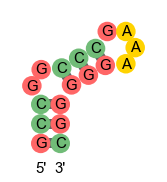

In [331]:
# test get_target_struct
row = annotation_updated.query('Series == "Bulges"').iloc[-2,:]
try:
    draw_struct(row.RefSeq, row.TargetStruct)
except:
    print(row.RefSeq, row.TargetStruct)
    print(len(row.RefSeq), len(row.TargetStruct))

In [174]:
from scripts.make_lib3 import *

In [187]:
scaffolds = ['GC','CGCG','GATC']
scaffolds = get_rc(scaffolds)
mismatches_3mer = make_3mer_mismatches(scaffolds, add_loop=True, filter_3_mismatches=True)

In [243]:
df_3mer = pd.DataFrame(mismatches_3mer).melt()
df_3mer.columns = ['scaffold', 'RefSeq']

In [269]:
df_3mer['SEQID'] = ['MMTM%d'%i for i in range(len(df_3mer))]
df_3mer['Series'] = 'MisMatches'
df_3mer['ConstructType'] = '3mer'
df_3mer['topScaffold'] = df_3mer.scaffold.apply(lambda x: get_top_bottom_scaffold(x, 'top'))
df_3mer['bottomScaffold'] = df_3mer.scaffold.apply(lambda x: get_top_bottom_scaffold(x, 'bottom'))
df_3mer['TargetStruct'] = df_3mer.apply(get_target_struct, axis=1)
nupack_param = df_3mer.progress_apply(lambda row: get_nupack_dH_dS_Tm_dG_37(row.RefSeq, get_target_struct(row)), axis=1)
df_3mer[['dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK', 'dG_37_NUPACK']] = np.array(nupack_param.values.tolist())
df_3mer['dG_37_ensemble_NUPACK'] = df_3mer.RefSeq.progress_apply(lambda seq: get_seq_ensemble_dG(seq, 37))
df_3mer

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 7104/7104 [05:57<00:00, 19.86it/s]


,scaffold,RefSeq,SEQID,Series,ConstructType,topScaffold,bottomScaffold,TargetStruct,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK
0,GCGC,GCAAAGCGAAAGCTAAGC,MMTM0,MisMatches,3mer,GCGC,GCGC,((..(((....)))..)),-39.6,-0.118459,61.143413,-2.86
1,GCGC,GCAATGCGAAAGCAAAGC,MMTM1,MisMatches,3mer,GCGC,GCGC,((..(((....)))..)),-40.3,-0.119845,63.117016,-3.13
2,GCGC,GCAACGCGAAAGCGAAGC,MMTM2,MisMatches,3mer,GCGC,GCGC,((..(((....)))..)),-44.4,-0.129453,69.830324,-4.25
3,GCGC,GCAAGGCGAAAGCCAAGC,MMTM3,MisMatches,3mer,GCGC,GCGC,((..(((....)))..)),-41.8,-0.122457,68.194655,-3.82
4,GCGC,GCAAAGCGAAAGCATAGC,MMTM4,MisMatches,3mer,GCGC,GCGC,((.(.((....)).).)),-21.7,-0.067000,50.731376,-0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
7099,GATCGATC,GATGGGCGATCGAAAGATCGGCGATC,MMTM7099,MisMatches,3mer,CGATCGATCG,GATATC,(((.(.(((((....))))).).))),-71.7,-0.204353,77.713916,-8.32
7100,GATCGATC,GATGGACGATCGAAAGATCGTGGATC,MMTM7100,MisMatches,3mer,CGATCGATCG,GATATC,(((..((((((....))))))..))),-68.2,-0.200645,66.754066,-5.97
7101,GATCGATC,GATGGTCGATCGAAAGATCGAGGATC,MMTM7101,MisMatches,3mer,CGATCGATCG,GATATC,(((..((((((....))))))..))),-68.0,-0.200451,66.084357,-5.83
7102,GATCGATC,GATGGCCGATCGAAAGATCGGGGATC,MMTM7102,MisMatches,3mer,CGATCGATCG,GATATC,(((..((((((....))))))..))),-69.8,-0.203224,70.312954,-6.77


In [341]:
annotation_all = pd.concat([annotation_updated, df_3mer.drop(columns='scaffold')])

In [350]:
annotation_all

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_ensemble_NUPACK,TargetStruct,dG_37_NUPACK
0,TRINN0,TRIloop,NN,GCGC,NaN,GCGAAAATCGC,-26.4,-0.078156,64.637129,-2.645853,((((...)))),-2.16
1,TRINN1,TRIloop,NN,GCGC,NaN,GCGAAATTCGC,-26.4,-0.078156,64.637129,-2.645879,((((...)))),-2.16
2,TRINN2,TRIloop,NN,GCGC,NaN,GCGAAACTCGC,-26.4,-0.078156,64.637129,-2.646456,((((...)))),-2.16
3,TRINN3,TRIloop,NN,GCGC,NaN,GCGAAAGTCGC,-26.4,-0.078156,64.637129,-2.650905,((((...)))),-2.16
4,TRINN4,TRIloop,NN,GCGC,NaN,GCGAATATCGC,-26.4,-0.078156,64.637129,-2.645866,((((...)))),-2.16
...,...,...,...,...,...,...,...,...,...,...,...,...
7099,MMTM7099,MisMatches,3mer,GATATC,CGATCGATCG,GATGGGCGATCGAAAGATCGGCGATC,-71.7,-0.204353,77.713916,-8.910037,(((.(.(((((....))))).).))),-8.32
7100,MMTM7100,MisMatches,3mer,GATATC,CGATCGATCG,GATGGACGATCGAAAGATCGTGGATC,-68.2,-0.200645,66.754066,-7.424770,(((..((((((....))))))..))),-5.97
7101,MMTM7101,MisMatches,3mer,GATATC,CGATCGATCG,GATGGTCGATCGAAAGATCGAGGATC,-68.0,-0.200451,66.084357,-6.907534,(((..((((((....))))))..))),-5.83
7102,MMTM7102,MisMatches,3mer,GATATC,CGATCGATCG,GATGGCCGATCGAAAGATCGGGGATC,-69.8,-0.203224,70.312954,-7.955172,(((..((((((....))))))..))),-6.77


In [351]:
annotation_all.to_csv('./data/annotation/NNNlib2b_annotation_20220316.tsv', sep='\t', index=False)

## Update NUPACK param calculation

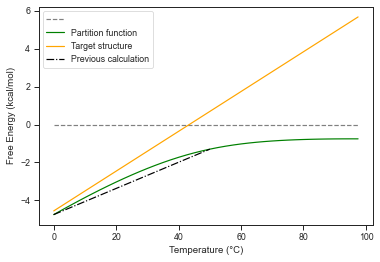

In [16]:
T = np.arange(0, 100, 2.5)
dG_ensemble = np.zeros_like(T)
dG_target_struct = np.zeros_like(T)

# row = df_3mer.iloc[1,:]
row = annotation_updated.query('Series == "WatsonCrick"').iloc[0,:]
for i,celsius in enumerate(T):
    dG_ensemble[i] = get_seq_ensemble_dG(row.RefSeq, celsius, sodium=0.075)
    dG_target_struct[i] = get_seq_structure_dG(row.RefSeq, get_target_struct(row), celsius, sodium=0.075)
    
plt.plot(T, np.zeros_like(T), '--', c='gray')
plt.plot(T, dG_ensemble, 'g')
plt.plot(T, dG_target_struct, 'orange')
plt.plot(T[[0,20]], dG_ensemble[[0,20]], 'k-.')
plt.xlabel('Temperature (°C)')
plt.ylabel('Free Energy (kcal/mol)')
plt.legend(['','Partition function', 'Target structure', 'Previous calculation'])
save_fig('./fig/NUPACK/NUPACK_different_ways_calc_dG.pdf')

In [302]:
get_seq_ensemble_dG(row.RefSeq, celsius=100, sodium=0.075)

-0.7562581175899865

In [300]:
get_mfe_struct(row.RefSeq, celsius=100, sodium=0.75, return_free_energy=True)

('..............', 0.0)

In [307]:
t_model = nupack.Model(material='DNA', celsius=100, sodium=1, magnesium=0.0)
nupack.mfe(row.RefSeq, model=t_model)

[StructureEnergy(Structure('..............'), energy=0.0, stack_energy=0.0)]

In [308]:
nupack.pfunc(row.RefSeq, t_model)

(Decimal('4.603604260'), -1.132170575873957)

In [271]:
sublib = annotation_updated.sample(n=100)
nupack_param = sublib.progress_apply(lambda row: get_nupack_dH_dS_Tm_dG_37(row.RefSeq, get_target_struct(row)), axis=1)
sublib[[x+'_new' for x in ['dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK', 'dG_37_NUPACK']]] = np.array(nupack_param.values.tolist())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.69it/s]


In [272]:
sublib

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK,dH_NUPACK_new,dS_NUPACK_new,Tm_NUPACK_new,dG_37_NUPACK_new
16747,BNNN3947,Bulges,NNN_3primebulge,GC,CG,GTGAGCGAAAGCTTTCAC,-31.715037,-0.090313,78.018012,-3.411813,0.00000,-0.000000,NaN,0.000000
9797,TETNNN1093,TETRAloop,NNN,GATCGATC,NaN,GATCTATATTTAGATC,-36.647973,-0.108814,63.643371,-2.670590,-41.00000,-0.124972,54.924045,-2.240000
12764,TETNNN4060,TETRAloop,NNN,GATCGATC,NaN,GATCCCGTGAGGGATC,-42.928337,-0.118533,89.014994,-6.022060,-45.80000,-0.129099,81.616983,-5.760000
13643,BNNN843,Bulges,NNN_3primebulge,GC,CG,GATTTCGAAAGAAAAATC,-30.063136,-0.087858,69.028912,-2.687298,0.00000,-0.000000,NaN,0.000000
20260,BNNN7460,Bulges,NNN_5prime_bulge,GC,CG,GGCTGGCGAAAGCCGCC,-49.223402,-0.141062,75.798972,-5.310471,0.00000,-0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30118,SD8,Control,StemDangle_3p,NaN,GCGCGCGC,GCGCGAAAGCGCAAA,-42.037937,-0.115846,89.727053,-6.094899,-41.39329,-0.113356,92.010894,-6.214564
9759,TETNNN1055,TETRAloop,NNN,GATCGATC,NaN,GATCTAATGGTAGATC,-36.679434,-0.108673,64.372482,-2.750052,-40.90000,-0.124327,55.821343,-2.340000
17538,BNNN4738,Bulges,NNN_5prime_bulge,GC,CG,GTCCGTGCGAAAGCAGAC,-34.001662,-0.099685,67.942324,-2.920629,0.00000,-0.000000,NaN,0.000000
12985,BNNN185,Bulges,NNN_3primebulge,GC,CG,GAATACGAAAGTATCTTC,-25.563608,-0.073776,73.353459,-2.470073,0.00000,-0.000000,NaN,0.000000


In [294]:
annotation_updated.query('Series == "WatsonCrick"')

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK
26112,WC0,WatsonCrick,WC_5ntstem,NaN,NaN,AAAAAGAAATTTTT,-27.941107,-0.080679,73.176115,-2.681988
26113,WC3,WatsonCrick,WC_5ntstem,NaN,NaN,AAAATGAAAATTTT,-27.056942,-0.078517,71.447974,-2.482308
26114,WC6,WatsonCrick,WC_5ntstem,NaN,NaN,AAAAGGAAACTTTT,-30.196117,-0.086264,76.894068,-3.252249
26115,WC9,WatsonCrick,WC_5ntstem,NaN,NaN,AAAACGAAAGTTTT,-31.965176,-0.091484,76.256427,-3.406426
26116,WC12,WatsonCrick,WC_5ntstem,NaN,NaN,AAATAGAAATATTT,-26.724877,-0.078610,66.816949,-2.091868
...,...,...,...,...,...,...,...,...,...,...
29179,WC3059,WatsonCrick,WC_7ntstem,GC,GC,GCCCGCGGAAACGCGGGC,-61.456102,-0.162075,106.032559,-11.177591
29180,WC3062,WatsonCrick,WC_7ntstem,GC,GC,GCCCCAGGAAACTGGGGC,-54.688434,-0.146702,99.635576,-9.174301
29181,WC3065,WatsonCrick,WC_7ntstem,GC,GC,GCCCCTGGAAACAGGGGC,-54.693000,-0.146720,99.620698,-9.173155
29182,WC3068,WatsonCrick,WC_7ntstem,GC,GC,GCCCCGGGAAACCGGGGC,-57.046872,-0.150207,106.638235,-10.448961


<AxesSubplot:xlabel='dG_37_NUPACK_new', ylabel='dG_37_NUPACK'>

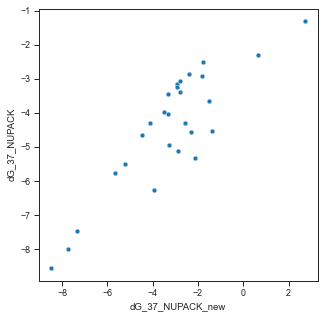

In [281]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=sublib.dropna(), x='dG_37_NUPACK_new', y='dG_37_NUPACK')
# plt.xlim([40,100])
# plt.ylim([40,100])